In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from math import sqrt
from scipy import stats
from sklearn.linear_model import LinearRegression
from wrangle import train_val_test, clean_and_convert
from evaluate import plot_residuals, regression_errors, baseline_mean_errors, better_than_baseline
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

# Evaluating Regression Models

1) Load your zillow dataset.

In [2]:
df = clean_and_convert()
df.head()

,bedrooms,bathrooms,squarefeet,tax_value,year_built,tax_amount,fips,bedrooms_bin,bathrooms_bin,squarefeet_bin,decades
4,4,2,3633,296425,2005,6941,6037,6,3,4000,2010
6,3,4,1620,847770,2011,10244,6037,4,7,2000,2020
7,3,2,2077,646760,1926,7924,6037,4,3,2500,1930
11,0,0,1200,5328,1972,91,6037,2,1,1500,1980
14,0,0,171,6920,1973,255,6037,2,1,500,1980


In [3]:
train, val, test = train_val_test(df)

2) Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.  
   Modify and add to the code above as necessary for it to work with the zillow dataset.

In [4]:
#defining the X and y train and val
X_train = train[['squarefeet']]
y_train = train.tax_value

X_val = val[['squarefeet']]
y_val = val.tax_value

In [5]:
#defining the baseline 
y_baseline = y_train.median()
y_baseline

324536.5

In [6]:
#creating a dataframe to hold y_actual and y_baseline
preds = pd.DataFrame({'y_actual': y_train,
              'y_baseline': y_baseline})

preds.head()

,y_actual,y_baseline
34469,131067,324536.5
857921,209578,324536.5
1259741,397364,324536.5
1094500,99366,324536.5
1685666,76733,324536.5


In [7]:
#fitting the model on the X and y train
lm = LinearRegression()
lm.fit(X_train, y_train)

#creating a column for the y predictions
preds['y_hat'] = lm.predict(X_train)

In [8]:
#evaluating the rsme_model
rmse_model = sqrt(mean_squared_error(preds['y_actual'], preds['y_hat']))
rmse_model

386001.6879146049

In [9]:
#creating a y_hat residuals column
preds['y_hat_resids'] = preds['y_hat'] - preds['y_actual']

In [10]:
#creating a y_baseline residuals column
preds['y_baseline_resids'] = preds['y_baseline'] - preds['y_actual']

3) Plot the residuals for the linear regression model that you made.

#### baseline

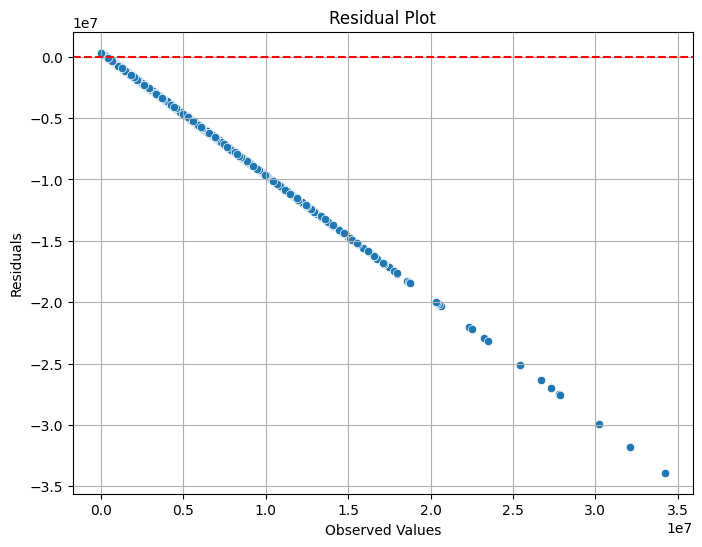

In [11]:
#creating a scatterplot to visualize y_actual and y_baseline_resids
plt.figure(figsize=(8, 6))
sns.scatterplot(data=preds, x='y_actual', y='y_baseline_resids')
plt.axhline(y=0, color='r', linestyle='--')
    
# Adding labels and title
plt.xlabel("Observed Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
    
# Showing the plot
plt.grid(True)
plt.show()

#### model

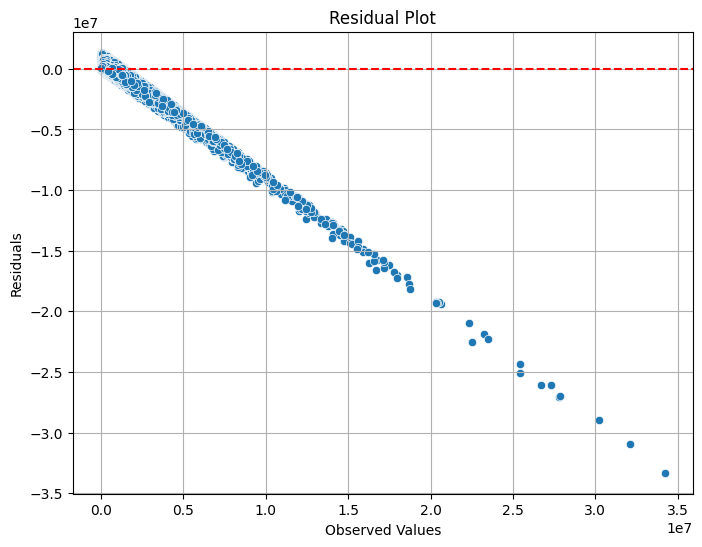

In [12]:
#creating a scatterplot to visualize y_actual and y_hat_resids
plt.figure(figsize=(8, 6))
sns.scatterplot(data=preds, x='y_actual', y='y_hat_resids')
plt.axhline(y=0, color='r', linestyle='--')
    
# Adding labels and title
plt.xlabel("Observed Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
    
# Showing the plot
plt.grid(True)
plt.show()

4) Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [13]:
preds['y_hat_resids_sq'] = preds['y_hat_resids'] ** 2

In [14]:
preds['y_hat_minus_mean'] = preds['y_hat'] - preds['y_actual'].mean()

#### sum of squared errors

In [15]:
sse_hat = preds['y_hat_resids_sq'].sum()
sse_hat

2.2012980753836256e+17

#### explained sum of squares

In [16]:
ess_hat = sum(preds['y_hat_minus_mean'] ** 2)
ess_hat

8.210738041749333e+16

#### total sum of squares

In [17]:
tss_hat = sse_hat + ess_hat
tss_hat

3.022371879558559e+17

#### mean squared error

In [18]:
mse_hat = sse_hat / len(preds)
mse_hat

148997303072.92404

#### root mean squared error

In [19]:
rmse_hat = sqrt(mse_hat)
rmse_hat

386001.6879146049

5) Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

In [20]:
preds['y_baseline_resids_sq'] = preds['y_baseline_resids'] ** 2

#### sum of squared errors

In [21]:
sse_baseline = preds['y_baseline_resids_sq'].sum()
sse_baseline

3.1729921373076096e+17

#### mean squared error

In [22]:
mse_baseline = sse_baseline / len(preds)
mse_baseline

214767493969.68268

#### root mean squared error

In [23]:
rmse_baseline = sqrt(mse_baseline)
rmse_baseline

463430.13925475616

6) Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [24]:
# Determine which model performs better
if sse_hat < sse_baseline:
    performance = "better"
else:
    performance = "worse"
print(f"Sum of Squared Errors (Baseline): {sse_baseline:.2f}")
print(f"Sum of Squared Errors (Your Model): {sse_hat:.2f}")
print(f"My model performs {performance} than the baseline model in terms of SSE.")

Sum of Squared Errors (Baseline): 317299213730760960.00
Sum of Squared Errors (Your Model): 220129807538362560.00
My model performs better than the baseline model in terms of SSE.


7) What is the amount of variance explained in your model?

In [25]:
#model score
model_r2 = r2_score(preds['y_actual'], preds['y_hat'])
model_r2

0.2716653796735232

8) Is your model better than the baseline model?

In [26]:
print(f"My model performs {performance} than the baseline model in terms of SSE.")

My model performs better than the baseline model in terms of SSE.


9) Create a file named evaluate.py that contains the following functions.

#### a)
- plot_residuals(y, yhat): creates a residual plot

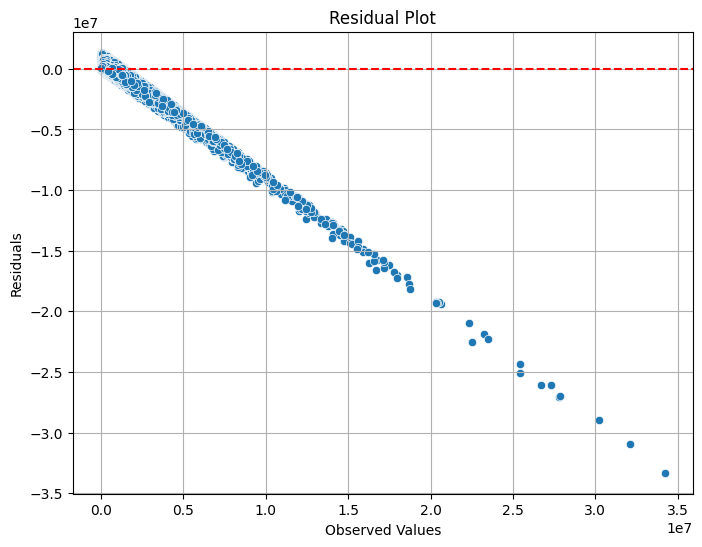

In [27]:
plot_residuals(preds.y_actual, preds.y_hat)

#### b)
- regression_errors(y, yhat): returns the following values:
    - sum of squared errors (SSE)
    - explained sum of squares (ESS)
    - total sum of squares (TSS)
    - mean squared error (MSE)
    - root mean squared error (RMSE) 

In [28]:
regression_errors(preds.y_actual, preds.y_hat)

{'SSE': 2.2012980753836256e+17,
 'ESS': 8.210738041751819e+16,
 'TSS': 3.0223718795584525e+17,
 'MSE': 148997303072.92404,
 'RMSE': 386001.6879146049}

#### c)
- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model

In [29]:
baseline_mean_errors(preds.y_actual)

{'SSE': 3.1729921373076096e+17,
 'ESS': 10194899293.16469,
 'TSS': 3.0223718795584525e+17,
 'MSE': 214767493969.68268,
 'RMSE': 463430.13925475616}

#### d)
- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [30]:
better_than_baseline(preds.y_actual, preds.y_hat)

True
